## What's the methodology?

The **adaptive asset allocation** algorithm (or "portfolio recipe") uses two distinct mechanisms to choose assets and percentage allocations for the portfolio.

1. Momentum. This is defined by the total return over the past 180 trading days.
2. Minimum variance. According to the Macquarie paper, "The minimum variance algorithm takes into account the volatility and correlations between the Top 5 assets to create the momentum portfolio with the lowest expected portfolio level volatility." This mechanism uses volatility to choose the asset allocation each month, as defined by the standard deviation over the past 20 trading days.

reference:
- [The Adaptive Asset Allocation Portfolio: How To Maximize Return Using Minimum Variance And Momentum](https://seekingalpha.com/article/4027202-adaptive-asset-allocation-portfolio-maximize-return-using-minimum-variance-momentum)

- [Adaptive Asset Allocation: A Primer](https://pdfs.semanticscholar.org/aecd/ef489a511cb1da104328c24f551bee6e28ac.pdf)
> Chart 3. Probability that top n ranked assets by 6 month momentum will perform in the
top half the following month. Top 3 ranked assets have the highest probability to perform in the top half the following month.

- [美股過去40年 回報最高的投資風格](https://www.usstockcaptain.com/single-post/2017/09/07/%E7%BE%8E%E8%82%A1%E9%81%8E%E5%8E%BB40%E5%B9%B4-%E5%9B%9E%E5%A0%B1%E6%9C%80%E9%AB%98%E7%9A%84%E6%8A%95%E8%B3%87%E9%A2%A8%E6%A0%BC)
- [MSCI Factor Indexes in Perspective: Insights from 40 Years of Data](https://www.msci.com/documents/10199/313df136-0da3-46b2-ace0-5c5b737a0989)
> **摘要**：動能策略的核心即爲，强者越强、弱者越弱；最近股價表現跑贏大市及其他個股者，將會續創佳績。MSCI 採用的資料涵蓋 40 年，當中動能投資有 25 年跑贏以 MSCI USA 作爲 benchmark 的標的，且若在跑輸 MSCI USA 的情況下，最長持續期間僅爲 3 年。 2013 年 4 月 16 日，iShares 推出動能因子 ETF： iShare Edge MSCI USA Momentum Factor ETF (MTUM)。 MTUM 由 MSCI USA 當中動能最強的成分股組成，截至 2019 年 8 月底，MSCI USA 内共有 637 支股票，覆蓋全美 85 % 流通市值。動能的計算方法為，回顧股價過去 6、12 個月超過無風險利率的超額報酬率，再除以過去 3 年年化每周波動度，最後得到一個動力分數 (momentum score)。此方法即爲，將最近半年、一年負報酬的個股剔除，MTUM 選取 100-350 (截至 2019/09/16 持股為 128 檔) 動力分數最高的個股，再依流通市值分配權重。iShares 統計結果表示，不同商業周期，不同因子表現不盡相同，在復甦階段尾聲及進入放緩之初，動能因子的表現最好。

| MTUM Sectors | Weights (%) |
|:-----------------------:|:-----------:|
| Information Technology | 39.79% |
| Health Care | 12.45% |
| Industrials | 10.58% |
| Consumer Staples | 8.21% |
| Communication | 7.45% |
| Consumer Discretionary | 5.21% |
| Financials | 4.86% |
| Utilities | 4.57% |
| Real Estate | 3.84% |
| Materials | 2.91% |
| Cash and/or Derivatives | 0.13% |

data range: 1975-2014

| Style | Annualized Returns |
|:------------------:|:------------------:|
| Momentum | 14.0% |
| Quality | 12.5% |
| High Div Yield | 13.0% |
| Value Weighted | 12.4% |
| Equal Weighted | 13.1% |
| Risk Weighted | 13.2% |
| Minimum Volatility | 11.4% |
| MSCI USA | 11.3% |


## Backtesting Module: SelectMomentum(), WeighERC()


In [1]:
# -*- coding: utf-8 -*-
# @Author: Boya Chiou
# @Date: 2019-09-10 09:39:03
# @Last Modified by: Boya Chiou
# @Last Modified time: 2019-09-10 09:41:47

from __future__ import division
import bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
# get the data
start = '2000-01-01'
# start2014 = '2014-01-01'
# end2014 = '2014-12-31'

"""
# Harry Browne Permanent Portfolio:
4 major economic regimes - prosperity, inflation, deflation and recession.
In each regime you will often see one or two asset classes perform better than the others.
By creating a portfolio of the 4 assets held equal-weight: cash, gold, stocks and bonds,
you would be well prepared for each regime.

# ReSolve AM
- U.S. Stocks
- European Stocks
- Japanese Stocks
- Emerging Market Stocks
- U.S. REITs
- International REITs
- U.S. Intermediate Treasuries
- U.S. long-term Treasuries
- Commodities
- Gold

VTI: Vanguard Total Stock Market ETF
VGK: Vanguard FTSE Europe ETF
TLT: iShares 20 Plus Year Treasury Bond
RWX: SPDR Dow Jones International Real Estate
IEF: iShares 7-10 Year Treasury Bond ETF
ICF: iShares Cohen & Steers REIT ETF
GLD: SPDR Gold Trust
EWJ: iShares MSCI Japan ETF
EEM: iShares MSCI Emerging Markets ETF
DBC: PowerShares DB Commodity Index
"""

"""
MTUM: ISHARES TR/EDGE MSCI USA MOMEN
SPHD: INVESCO EXCHANG/S&P 500 HIGH DIVID
TLT: iShares Barclays 20+ Yr Treas.Bond
"""


# ==========================
# Default Strategy: Equal Weight
# ==========================
# algo here
def s(name, dta):
    s = bt.Strategy(name, [bt.algos.RunMonthly(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    t = bt.Backtest(s, dta)
    return t

# ==========================
# Default Strategy: Buy-Hold
# ==========================
# algo here
def ss(name, dta):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    t = bt.Backtest(s, dta)
    return t

# ==========================
# Momentum
# ==========================
# algo here
def momentum(name, dta):
    s = bt.Strategy(name, [bt.algos.RunMonthly(),
                           bt.algos.SelectAll(),
                           bt.algos.SelectMomentum(1),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    t = bt.Backtest(s, dta)
    return t


# ==========================
# Adaptive Asset Allocation
# ==========================
# algo here: Adaptive Asset Allocation
def aal(name, dta):
    s = bt.Strategy(name, [bt.algos.RunMonthly(),
                           bt.algos.SelectAll(),
                           bt.algos.SelectMomentum(1),
                           bt.algos.WeighERC(),
                           bt.algos.Rebalance()])
    t = bt.Backtest(s, dta)
    return t

In [120]:
s1 = s('defaultEW', dta5)
s2 = ss('defaultBH', dta5)
s3 = aal('AAA', dta5)
s4 = s('defaultSIZE', dta6)
s5 = s('defaultVLUE', dta7)
s6 = s('defaultMTUM', dta8)
s7 = s('defaultQUAL', dta9)
s8 = s('defaultMV', dta10)
s9 = s('Str01', str01)

res = bt.run(s1, s2, s3, s9)


defaultEW
0% [############################# ] 100% | ETA: 00:00:00defaultBH
0% [############################# ] 100% | ETA: 00:00:00AAA
0% [############################# ] 100% | ETA: 00:00:00Str01
0% [############################# ] 100% | ETA: 00:00:00

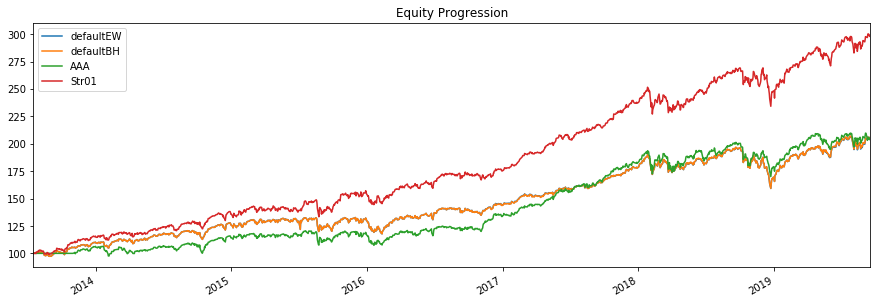

In [121]:
res.plot()

In [122]:
res.display()

Stat                 defaultEW    defaultBH    AAA         Str01
-------------------  -----------  -----------  ----------  ----------
Start                2013-07-17   2013-07-17   2013-07-17  2013-07-17
End                  2019-09-18   2019-09-18   2019-09-18  2019-09-18
Risk-free rate       0.00%        0.00%        0.00%       0.00%

Total Return         105.66%      105.81%      105.83%     199.52%
Daily Sharpe         1.00         1.00         0.97        1.51
Daily Sortino        1.56         1.55         1.50        2.47
CAGR                 12.39%       12.41%       12.41%      19.45%
Max Drawdown         -19.03%      -19.09%      -15.53%     -13.03%
Calmar Ratio         0.65         0.65         0.80        1.49

MTD                  2.62%        2.34%        -0.23%      1.85%
3m                   3.52%        3.36%        1.30%       3.82%
6m                   7.44%        7.50%        2.67%       8.82%
YTD                  21.38%       21.38%       14.90%      20.64%
1Y   

In [255]:
# Yearly price change
yearly = dta5.resample('A', how=lambda x: x[-1])

c:\users\boya\appdata\local\continuum\anaconda2\envs\py2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [263]:
# Plot yearly price change
yr = yearly.pct_change().dropna()
# yr.plot(figsize=(10, 6))

![Alt text](msci_cycle.png)
![Alt text](msci_cycle_real.png)

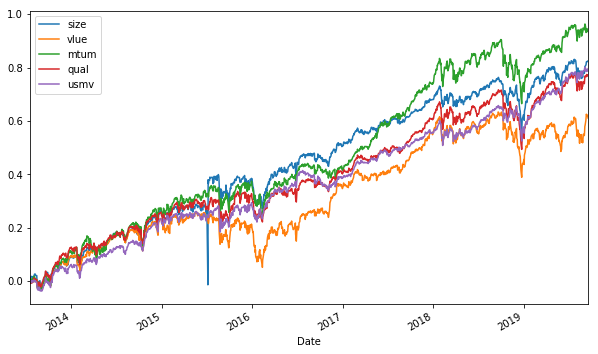

In [258]:
# total returns
dta5.pct_change().cumsum().plot(figsize=(10, 6))

In [266]:
str01

,nee,duk,d,aapl,msft,v,ba,unp,mmm,amzn,...,mcd,jnj,pfe,unh,pg,ko,pep,fb,goog,googl
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,51.191185,46.406841,38.770267,66.124229,24.544674,25.024055,57.482300,43.736332,69.369804,213.850006,...,71.285370,51.084641,17.471457,47.742321,50.478199,29.105501,54.701862,38.230000,299.078979,300.500488
2012-05-21,51.348694,46.255463,38.725784,69.976631,24.947184,25.819386,59.668545,44.964714,70.158951,218.110001,...,72.411964,51.181431,17.448238,49.121788,50.374893,29.286308,54.589443,34.029999,305.908386,307.362366
2012-05-22,51.671600,46.817719,38.903725,69.439308,24.955561,26.301468,59.419182,45.454445,69.884834,215.330002,...,72.467537,51.221729,17.316641,49.272125,50.184174,29.160536,54.669739,31.000000,299.278229,300.700714
2012-05-23,51.143921,46.709587,38.710953,71.133591,24.410501,26.474751,59.493969,45.907425,70.441368,217.279999,...,72.578568,51.020145,17.099894,48.953781,49.580212,29.302025,54.605492,32.000000,303.592072,305.035034
2012-05-24,51.214809,47.142082,38.925972,70.480331,24.376957,26.608053,59.344364,46.070679,70.590904,215.240005,...,72.618248,51.378410,17.138592,49.714260,49.723251,29.699005,55.255928,33.029999,300.702881,302.132141
2012-05-25,51.451080,47.488075,38.963047,70.102554,24.368570,26.519192,58.188885,45.658508,70.424751,212.889999,...,72.237434,50.898006,17.130856,49.625832,49.659672,29.569302,55.119431,31.910000,294.660553,296.061066
2012-05-29,51.695217,47.531330,38.925972,71.346817,24.787857,26.721348,58.521385,46.446423,71.213905,214.750000,...,72.118431,50.963139,17.169559,49.652363,50.025223,29.659702,55.673527,28.840000,296.060303,297.467468
2012-05-30,51.325069,47.250206,38.841709,72.207024,24.603371,26.101522,57.681801,45.320225,70.150627,209.229996,...,71.491638,50.653732,17.061186,49.670048,49.524582,29.502483,55.210606,28.190001,293.016693,294.409424
2012-05-31,51.937119,47.531330,38.991516,72.027489,24.477589,25.592779,57.864685,45.955524,70.117416,212.910004,...,71.435684,50.832874,16.929590,49.316341,49.500732,29.372786,54.911160,29.600000,289.345459,290.720734


In [7]:
dta5.head(5).values

array([[47.29888153, 48.15499496, 50.20671463, 45.430233  , 30.01006317],
       [47.29888153, 48.06700134, 50.4294014 , 45.07693863, 30.08099365],
       [48.15496826, 48.19897842, 50.49435043, 45.29434586, 30.08985901],
       [48.15496826, 48.19897842, 50.41085434, 45.22188568, 30.05439758],
       [48.15496826, 48.19897842, 50.23454666, 45.15846252, 29.85935593]])

In [9]:
dta5.head(5).T

Date,2013-07-18 00:00:00,2013-07-19 00:00:00,2013-07-22 00:00:00,2013-07-23 00:00:00,2013-07-24 00:00:00
size,47.298882,47.298882,48.154968,48.154968,48.154968
vlue,48.154995,48.067001,48.198978,48.198978,48.198978
mtum,50.206715,50.429401,50.494350,50.410854,50.234547
qual,45.430233,45.076939,45.294346,45.221886,45.158463
usmv,30.010063,30.080994,30.089859,30.054398,29.859356


In [10]:
dta5.head(5)

,size,vlue,mtum,qual,usmv
Date,,,,,
2013-07-18,47.298882,48.154995,50.206715,45.430233,30.010063
2013-07-19,47.298882,48.067001,50.429401,45.076939,30.080994
2013-07-22,48.154968,48.198978,50.494350,45.294346,30.089859
2013-07-23,48.154968,48.198978,50.410854,45.221886,30.054398
2013-07-24,48.154968,48.198978,50.234547,45.158463,29.859356


$$R_p = w_1R_1 + w_2R_2$$
\begin{align*}
E(R_p) &= E(w_1R_1 + w_2R_2)\\ 
&= w_1E(R_1) + w_2E(R_2)\\
\end{align*}

\begin{align*}
\varphi_{12} &= {Cov(X_1,X_2) \over \sigma_1\sigma_2} \\ 
&= {\sigma_{12} \over \sigma_1\sigma_2}
\end{align*}

\begin{align*}
Var(R_p) &= Var(w_1R_1 + w_2R_2)\\
&= Var(w_1R_1) + Var(w_2R_2) + 2Cov(w_1R_1,w_2R_2)
\end{align*}

In [19]:
dspy = bt.get('spy', start='2019-01-03', end='2019-06-30')

In [20]:
sspy = s('defaultEW', dspy)
res = bt.run(sspy)

defaultEW
0% [############################# ] 100% | ETA: 00:00:00

In [21]:
res.display()

Stat                 defaultEW
-------------------  -----------
Start                2019-01-01
End                  2019-06-28
Risk-free rate       0.00%

Total Return         18.20%
Daily Sharpe         2.76
Daily Sortino        4.76
CAGR                 40.93%
Max Drawdown         -6.62%
Calmar Ratio         6.19

MTD                  6.96%
3m                   4.88%
6m                   -
YTD                  18.20%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  40.93%

Daily Sharpe         2.76
Daily Sortino        4.76
Daily Mean (ann.)    34.79%
Daily Vol (ann.)     12.62%
Daily Skew           -0.11
Daily Kurt           3.03
Best Day             3.35%
Worst Day            -2.51%

Monthly Sharpe       1.34
Monthly Sortino      2.36
Monthly Mean (ann.)  23.32%
Monthly Vol (ann.)   17.38%
Monthly Skew         -1.45
Monthly Kurt         2.75
Best Month           6.96%
Worst Month          -6.38%

Yearly Sharpe        